# N-Gram模型

In [1]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()

In [2]:
print(test_sentence)

['When', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow,', 'And', 'dig', 'deep', 'trenches', 'in', 'thy', "beauty's", 'field,', 'Thy', "youth's", 'proud', 'livery', 'so', 'gazed', 'on', 'now,', 'Will', 'be', 'a', "totter'd", 'weed', 'of', 'small', 'worth', 'held:', 'Then', 'being', 'asked,', 'where', 'all', 'thy', 'beauty', 'lies,', 'Where', 'all', 'the', 'treasure', 'of', 'thy', 'lusty', 'days;', 'To', 'say,', 'within', 'thine', 'own', 'deep', 'sunken', 'eyes,', 'Were', 'an', 'all-eating', 'shame,', 'and', 'thriftless', 'praise.', 'How', 'much', 'more', 'praise', "deserv'd", 'thy', "beauty's", 'use,', 'If', 'thou', 'couldst', 'answer', "'This", 'fair', 'child', 'of', 'mine', 'Shall', 'sum', 'my', 'count,', 'and', 'make', 'my', 'old', "excuse,'", 'Proving', 'his', 'beauty', 'by', 'succession', 'thine!', 'This', 'were', 'to', 'be', 'new', 'made', 'when', 'thou', 'art', 'old,', 'And', 'see', 'thy', 'blood', 'warm', 'when', 'thou', "feel'st", 'it', 'cold.']


In [3]:
trigram = [((test_sentence[i],test_sentence[i+1]),test_sentence[i+2])
          for i in range(len(test_sentence)-2)]

In [4]:
len(trigram)

113

In [5]:
print(trigram)

[(('When', 'forty'), 'winters'), (('forty', 'winters'), 'shall'), (('winters', 'shall'), 'besiege'), (('shall', 'besiege'), 'thy'), (('besiege', 'thy'), 'brow,'), (('thy', 'brow,'), 'And'), (('brow,', 'And'), 'dig'), (('And', 'dig'), 'deep'), (('dig', 'deep'), 'trenches'), (('deep', 'trenches'), 'in'), (('trenches', 'in'), 'thy'), (('in', 'thy'), "beauty's"), (('thy', "beauty's"), 'field,'), (("beauty's", 'field,'), 'Thy'), (('field,', 'Thy'), "youth's"), (('Thy', "youth's"), 'proud'), (("youth's", 'proud'), 'livery'), (('proud', 'livery'), 'so'), (('livery', 'so'), 'gazed'), (('so', 'gazed'), 'on'), (('gazed', 'on'), 'now,'), (('on', 'now,'), 'Will'), (('now,', 'Will'), 'be'), (('Will', 'be'), 'a'), (('be', 'a'), "totter'd"), (('a', "totter'd"), 'weed'), (("totter'd", 'weed'), 'of'), (('weed', 'of'), 'small'), (('of', 'small'), 'worth'), (('small', 'worth'), 'held:'), (('worth', 'held:'), 'Then'), (('held:', 'Then'), 'being'), (('Then', 'being'), 'asked,'), (('being', 'asked,'), 'wher

In [6]:
trigram[0]

(('When', 'forty'), 'winters')

enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
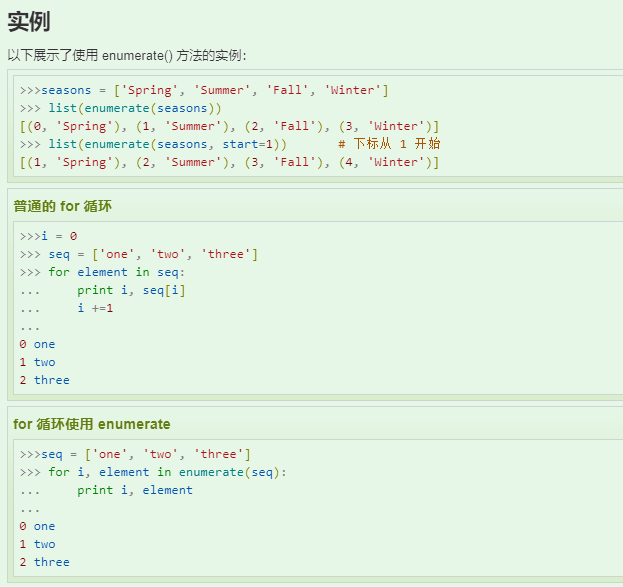

In [7]:
#建立每个词与数字的编码，据此构建词潜入
vocb = set(test_sentence) # 使用set将重复的元素去掉
#print(vocb)
#print(list(enumerate(vocb)))
word_to_idx = {word: i for i,word in enumerate(vocb)}
idx_to_word = {word_to_idx[word]: word for word in word_to_idx}

In [8]:
word_to_idx

{'beauty': 0,
 'say,': 1,
 "totter'd": 2,
 'his': 3,
 'it': 4,
 'gazed': 5,
 'see': 6,
 'within': 7,
 'dig': 8,
 'praise.': 9,
 'Shall': 10,
 'thine': 11,
 'to': 12,
 'count,': 13,
 'worth': 14,
 'Were': 15,
 'days;': 16,
 'where': 17,
 'old,': 18,
 'treasure': 19,
 'How': 20,
 'mine': 21,
 'deep': 22,
 'sunken': 23,
 'praise': 24,
 "excuse,'": 25,
 'besiege': 26,
 'and': 27,
 'trenches': 28,
 'Then': 29,
 'old': 30,
 'shame,': 31,
 "youth's": 32,
 'eyes,': 33,
 'answer': 34,
 'Will': 35,
 'succession': 36,
 'Proving': 37,
 'when': 38,
 'lusty': 39,
 'held:': 40,
 'Where': 41,
 'This': 42,
 'a': 43,
 'weed': 44,
 'field,': 45,
 'forty': 46,
 'livery': 47,
 'Thy': 48,
 'be': 49,
 'small': 50,
 'on': 51,
 'And': 52,
 'shall': 53,
 'sum': 54,
 'When': 55,
 'thine!': 56,
 'by': 57,
 'thriftless': 58,
 'new': 59,
 'so': 60,
 'proud': 61,
 'make': 62,
 'now,': 63,
 'thy': 64,
 'own': 65,
 'blood': 66,
 'all': 67,
 'art': 68,
 'were': 69,
 "feel'st": 70,
 'use,': 71,
 'the': 72,
 'To': 73,
 '

从上面可以看到每个词都对应一个数字，且这里的单词都各不相同

下面定义模型，模型的输入就是前面的两个词，输出是预测单词的概率

In [9]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable

类 nn.Module 的继承（具体官方文档https://pytorch.org/tutorials/）

In [18]:
#定义模型
class n_gram(nn.Module):   
    def __init__(self, vocab_size, context_size=CONTEXT_SIZE, n_dim=EMBEDDING_DIM):
        super(n_gram, self).__init__()
        
        self.embed = nn.Embedding(vocab_size, n_dim)
        self.classify = nn.Sequential(
            nn.Linear(context_size * n_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, vocab_size)
        )
    def forward(self, x):
        voc_embed = self.embed(x)  #得到词嵌入
        voc_embed = voc_embed.view(1, -1)  # 将两个词向量拼在一起
        out = self.classify(voc_embed)
        return out

最后的输出为条件概率，相当于一个分类问题，可以使用交叉熵来衡量误差

In [19]:
net = n_gram(len(word_to_idx))

criterion = nn.CrossEntropyLoss()   #交叉熵
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, weight_decay=1e-5)  #自动求导，随机梯度下降

In [20]:
for e in range(100):
    train_loss = 0
    for word, label in trigram:  #使用前100个最为训练集
        word = Variable(torch.LongTensor([word_to_idx[i] for i in word]))  #将两个词最为输入
        label = Variable(torch.LongTensor([word_to_idx[label]]))
        
        #前向传播
        out = net(word)
        loss = criterion(out, label)
        train_loss += loss.item()
        #反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (e + 1) % 20 == 0:
        print('epoch: {},loss:{:.6f}'.format(e + 1, train_loss / len(trigram)))

epoch: 20,loss:0.742471
epoch: 40,loss:0.133887
epoch: 60,loss:0.086193
epoch: 80,loss:0.070487
epoch: 100,loss:0.062206


测试下结果

In [21]:
net = net.eval()

In [16]:
#根据前两个单词，预测下一个单词
word, label = trigram[19]
print('input:{}'.format(word))
print('label:{}'.format(label))
print()
word = Variable(torch.LongTensor([word_to_idx[i] for i in word]))
out = net(word)
pred_label_idx = out.max(1)[1].item()
predict_word = idx_to_word[pred_label_idx]
print('real word is {}, predicted word is {}'.format(label, predict_word))

input:('so', 'gazed')
label:on

real word is on, predicted word is on


试一下别的

In [17]:
word, label = trigram[75]
print('input:{}'.format(word))
print('label:{}'.format(label))
print()
word = Variable(torch.LongTensor([word_to_idx[i] for i in word]))
out = net(word)
pred_label_idx = out.max(1)[1].item()
predict_word = idx_to_word[pred_label_idx]
print('real word is {}, predicted word is {}'.format(label, predict_word))

input:("'This", 'fair')
label:child

real word is child, predicted word is child


可以看到训练集上基本准确，但由于样本太少，容易出现过拟合